## Create dataset

## Instructions:
create testing folder in home (~/) directory 

download glove embeddings and place "glove.6B" folder in home~/ directory http://nlp.stanford.edu/data/glove.6B.zip

also, increase the speed of your instance (i used 16 CPUs and it took 6 hours to train 1 epoch of 3,000 word sequences)

In [19]:
# !pip install keras
# !pip install tensorflow
# !pip install plotly
# !pip install gensim
# !pip install Word2Vec
# !pip install get_tmpfile
# !pip install gensim.test.utils
# !pip install boto
# !pip install google-compute-engine



    100% |████████████████████████████████| 51kB 19.9MB/s ta 0:00:01
  Running setup.py bdist_wheel for google-compute-engine ... done
  Stored in directory: /home/raymondleemids/.cache/pip/wheels/92/dc/36/aa22b839bc0f34908e2a9d5ac92ecb8a7e55d900da1faf144b
Successfully built google-compute-engine
You are using pip version 18.0, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [370]:
# Keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Flatten, LSTM, Conv1D, MaxPooling1D, Dropout, Activation
from keras.layers.embeddings import Embedding
from keras.models import model_from_json
from keras.preprocessing.text import text_to_word_sequence






## Plot
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)
import matplotlib as plt
# import matplotlib.pyplot

# NLTK
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import SnowballStemmer


# Other
import re
import string
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from np import util


# Word2Vec
from gensim.test.utils import common_texts, get_tmpfile # not working
from gensim.models import Word2Vec

import re
from collections import Counter
import os









[nltk_data] Downloading package stopwords to
[nltk_data]     /home/raymondleemids/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


ModuleNotFoundError: No module named 'np'

## Investigate ZIP file--why is filesize much lower, why is there so many NaN values

In [90]:

# list_of_csv = os.listdir("/home/raymondleemids/testing/")

In [91]:
# print(len(list_of_csv))
# # s/b ~1500

1503


In [92]:
# # home_dir = !~/testing
# # some files may be corrupted or format incorrect. only using 50 now

# # csv_list = []

# # for i in list_of_txt:
# #     csv_list.append(pd.read_csv('~/testing/%s' % i))

# # merged_csv = pd.concat(csv_list)



# csv_list = []


# for i in list_of_csv:
#     i = '~/testing/' + i
#     try:
#         csv_list.append(pd.read_csv(i))
#     except:
#         pass

# merged_csv = pd.concat(csv_list, ignore_index=True)


# merged_csv = merged_csv.drop(columns=['Close', 'Open', 'Day Change', 'Low', 'High', 'Overnight Change', 'Volume','Adj Close'])
# merged_csv.to_csv('final.csv')

/home/raymondleemids/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False




In [ ]:
# pd.read_csv('~/testing/%s' % 'PGR.csv')

In [94]:
# merged_csv

,8K_Content,Adj Close_GSPC,Adj Close_stock,Close_GSPC,Close_stock,Date,Day Change_GSPC,Day Change_stock,Day Change_stock percentage,High_GSPC,...,Open_stock,Overnight Change_GSPC,Overnight Change_stock,Overnight Change_stock percentage,Ticker,Time,Time_of_day,Unnamed: 0,Volume_GSPC,Volume_stock
0,ITEM 7. FINANCIAL STATEMENTS AN...,946.67,6.98,946.67,21.06,2003-05-15,7.39,0.40,0.019361,948.23,...,20.66,0.00,0.30,0.014735,DGIT,2.003052e+13,out_of_market,0,1.508700e+09,27641400.0
1,ITEM 7. FINANCIAL STATEMENTS AND ...,984.03,5.56,984.03,16.78,2003-08-13,-6.32,0.04,0.002389,992.50,...,16.74,0.00,0.07,0.004199,DGIT,2.003081e+13,out_of_market,1,1.208800e+09,17338800.0
2,ITEM 7. FINANCIAL STATEMENTS AND ...,1030.36,5.71,1030.36,17.25,2003-10-22,-15.67,-0.03,-0.001736,1046.03,...,17.28,0.00,-0.27,-0.015385,DGIT,2.003102e+13,out_of_market,2,1.647200e+09,15523800.0
3,ITEM 7. FINANCIAL STATEMENTS AND ...,1035.28,6.54,1035.28,19.76,2003-11-21,1.63,-0.16,-0.008032,1037.57,...,19.92,0.00,0.24,0.012195,DGIT,2.003112e+13,out_of_market,3,1.273800e+09,13581000.0
4,ITEM 7. FINANCIAL STATEMENTS AND ...,1144.11,8.00,1144.11,24.14,2004-02-20,-2.95,0.63,0.026797,1149.81,...,23.51,0.00,-0.04,-0.001699,DGIT,2.004022e+13,out_of_market,4,1.479600e+09,15453000.0
5,ITEM 7. FINANCIAL STATEMENTS AND ...,1098.70,7.31,1098.70,22.08,2004-05-07,-15.29,-0.47,-0.020843,1117.30,...,22.55,0.00,0.64,0.029210,DGIT,2.004051e+13,within_market,5,1.653600e+09,23919300.0
6,ITEM 7. FINANCIAL STATEMENTS AND ...,1084.10,7.01,1084.10,21.17,2004-05-17,-11.60,-0.03,-0.001415,1095.70,...,21.20,0.00,-0.31,-0.014412,DGIT,2.004052e+13,within_market,6,1.430100e+09,7708500.0
7,Item 2. Acquisition or Dispositio...,1134.43,6.71,1134.43,20.25,2004-06-25,-6.22,-0.01,-0.000494,1145.97,...,20.26,0.00,0.14,0.006958,DGIT,2.004063e+13,within_market,7,1.812900e+09,8228100.0
8,ITEM 7. FINANCIAL STATEMENTS AND ...,1065.22,3.26,1065.22,9.85,2004-08-09,1.25,0.18,0.018614,1069.46,...,9.67,0.00,0.24,0.025451,DGIT,2.004081e+13,within_market,8,1.086000e+09,39480300.0
9,Check the appropriate box below...,1096.19,4.02,1096.19,12.15,2004-08-24,0.51,-0.65,-0.050781,1100.94,...,12.80,0.00,0.18,0.014263,DGIT,2.004082e+13,out_of_market,9,1.092500e+09,23485500.0


In [93]:
# merged_csv.shape

(115384, 24)

In [95]:
# # merged_csv.groupby('Ticker')['Close'].count()
# merged_csv[merged_csv.Close_stock.isnull()].shape

(3414, 24)

In [96]:
# nans = merged_csv[merged_csv.Close_stock.isnull()]

In [97]:
# nans.to_csv('nans.csv', encoding='utf-8')

In [98]:
# merged_csv[merged_csv.Close_stock.isnull()]['Ticker'].unique()

array([nan], dtype=object)

In [99]:
# merged_csv.to_csv('merged.csv', encoding='utf-8')

## Skip to this part to load 'merged.csv'

In [292]:
final_csv = pd.read_csv('~/final.csv')

In [293]:
final_csv

,Unnamed: 0,8K_Content,Adj Close_GSPC,Adj Close_stock,Close_GSPC,Close_stock,Date,Day Change_GSPC,Day Change_stock,Day Change_stock percentage,...,Overnight Change_GSPC,Overnight Change_stock,Overnight Change_stock percentage,Ticker,Time,Time_of_day,Volume_GSPC,Volume_stock,Year,stock_overnight_movement_tag
0,0,==============================================...,953.99,12.56,953.99,13.04,2002-07-03,5.90,0.71,0.057583,...,0.00,-0.23,-0.018312,CSCO,2.002070e+13,out_of_market,1.527800e+09,77171300.0,2002.0,stay
1,2,Table of ContentsDate of report (Date of earli...,937.43,14.18,937.43,14.73,2002-08-20,-13.27,0.06,0.004090,...,0.00,-0.05,-0.003397,CSCO,2.002082e+13,out_of_market,1.308500e+09,60171900.0,2002.0,stay
2,3,Table of Contents Table of ContentsItems 1 th...,843.32,11.56,843.32,12.00,2002-09-19,-26.14,0.04,0.003344,...,0.00,-0.54,-0.043200,CSCO,2.002092e+13,out_of_market,1.524000e+09,80020200.0,2002.0,down
3,4,Table of ContentsDate of report (Date of earli...,882.50,11.31,882.50,11.75,2002-10-24,-13.64,0.27,0.023519,...,0.00,0.22,0.019538,CSCO,2.002102e+13,out_of_market,1.700570e+09,122749300.0,2002.0,stay
4,6,Table of ContentsDate of report (Date of earli...,843.59,12.71,843.59,13.20,2003-02-05,-4.61,-0.11,-0.008264,...,0.00,0.11,0.008333,CSCO,2.003020e+13,out_of_market,1.450800e+09,115080200.0,2003.0,stay
5,7,Table of ContentsTable of ContentsItem 5. Othe...,875.67,13.52,875.67,14.04,2003-03-20,1.65,0.07,0.005011,...,0.00,-0.25,-0.017581,CSCO,2.003032e+13,out_of_market,1.439100e+09,82711300.0,2003.0,stay
6,8,Date of report (Date of earliest event report...,868.30,12.72,868.30,13.21,2003-04-11,-3.28,-0.30,-0.022206,...,0.00,0.47,0.036043,CSCO,2.003041e+13,out_of_market,1.141600e+09,49207900.0,2003.0,up
7,9,Table of ContentsTable of ContentsItem 5. Othe...,893.58,13.43,893.58,13.95,2003-04-17,13.67,0.43,0.031805,...,0.00,-0.04,-0.002950,CSCO,2.003042e+13,out_of_market,1.430600e+09,55918100.0,2003.0,stay
8,10,Table of ContentsDate of report (Date of earli...,929.62,14.93,929.62,15.50,2003-05-07,-4.77,-0.08,-0.005135,...,0.00,-0.32,-0.020126,CSCO,2.003051e+13,out_of_market,1.531900e+09,103172800.0,2003.0,stay
9,12,"(c) Exhibits. On August 5, 20...",967.08,17.00,967.08,17.65,2003-08-06,1.62,-0.27,-0.015067,...,0.00,-0.94,-0.049841,CSCO,2.003081e+13,out_of_market,1.491000e+09,127298100.0,2003.0,down


In [249]:
# len(csv_list)

948

## Clean and Tokenize Words
# this part takes a while so if you don't want to update the pre-processing, skip down a few rows to load merged.csv which contains the output of this pre-processing

In [294]:
# # clean words 

# def clean_text(text):
    
#     ## Remove puncuation
#     text = text.translate(string.punctuation)
    
#     ## Convert words to lower case and split them
#     text = text.lower().split()
    
#     ## Remove stop words
#     stops = set(stopwords.words("english"))
#     text = [w for w in text if not w in stops and len(w) >= 3]
    
#     text = " ".join(text)

#     # Clean the text
#     text = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", text)
#     text = re.sub(r"what's", "what is ", text)
#     text = re.sub(r"\'s", " ", text)
#     text = re.sub(r"\'ve", " have ", text)
#     text = re.sub(r"n't", " not ", text)
#     text = re.sub(r"i'm", "i am ", text)
#     text = re.sub(r"\'re", " are ", text)
#     text = re.sub(r"\'d", " would ", text)
#     text = re.sub(r"\'ll", " will ", text)
#     text = re.sub(r",", " ", text)
#     text = re.sub(r"\.", " ", text)
#     text = re.sub(r"!", " ! ", text)
#     text = re.sub(r"\/", " ", text)
#     text = re.sub(r"\^", " ^ ", text)
#     text = re.sub(r"\+", " + ", text)
#     text = re.sub(r"\-", " - ", text)
#     text = re.sub(r"\=", " = ", text)
#     text = re.sub(r"'", " ", text)
#     text = re.sub(r"(\d+)(k)", r"\g<1>000", text)
#     text = re.sub(r":", " : ", text)
#     text = re.sub(r" e g ", " eg ", text)
#     text = re.sub(r" b g ", " bg ", text)
#     text = re.sub(r" u s ", " american ", text)
#     text = re.sub(r"\0s", "0", text)
#     text = re.sub(r" 9 11 ", "911", text)
#     text = re.sub(r"e - mail", "email", text)
#     text = re.sub(r"j k", "jk", text)
#     text = re.sub(r"\s{2,}", " ", text)
    
#     text = text.split()
#     stemmer = SnowballStemmer('english')
#     stemmed_words = [stemmer.stem(word) for word in text]
#     text = " ".join(stemmed_words)

#     return text

# # vocabulary_size = 20000
# # tokenizer = Tokenizer(num_words= vocabulary_size)
# # tokenizer.fit_on_texts(df['text'])

# # sequences = tokenizer.texts_to_sequences(df['text'])
# # data = pad_sequences(sequences, maxlen=50)



In [295]:
final_csv.shape

(107825, 27)

In [296]:
final_csv = final_csv.dropna()

In [297]:
final_csv.shape

(107456, 27)

In [ ]:
# # tokenize words
# final_csv['8K_Content_cleaned'] = final_csv['8K_Content'].map(lambda x: clean_text(x))

In [233]:
# merged_csv['8K_Content'][0]

'               ITEM 7. FINANCIAL STATEMENTS AND EXHIBITS.   ITEM 9. REGULATION FD DISCLOSURE (INFORMATION FURNISHED PURSUANT TO ITEM 12, "DISCLOSURE OF RESULTS OF OPERATIONS AND FINANCIAL CONDITION"). On May 9, 2003, Digital Generation Systems, Inc. announced its financial results for the quarter ended March 31, 2003. The full text of the press release issued in connection with the announcement is attached as Exhibit 99.1 to this Current Report on Form 8-K. In accordance with the procedural guidance in SEC Release No. 33-8216 the information in this Form 8-K and the Exhibit attached hereto is being furnished under "Item 9. Regulation FD Disclosure" rather than under "Item 12. Disclosure of Results of Operations and Financial Condition." The information shall not be deemed "filed" for purposes of Section 18 of the Securities Exchange Act of 1934, as amended (the "Exchange Act"), or otherwise subject to the liabilities of that section, nor shall it be deemed incorporated by reference in

In [232]:
# merged_csv['8K_Content_cleaned'][0]

'item financi statement exhibit item regul disclosur inform furnish pursuant item 12 disclosur result oper financi condit may 2003 digit generat system inc announc financi result quarter end march 31 2003 full text press releas issu connect announc attach exhibit 99 1 current report form 8 - k accord procedur guidanc sec releas no 33 - 8216 inform form 8 - k exhibit attach hereto furnish item regul disclosur rather item 12 disclosur result oper financi condit inform shall deem file purpos section secur exchang act 1934 amend the exchang act otherwis subject liabil section shall deem incorpor refer file secur act 1933 amend exchang act except expressli set forth specif refer file pursuant requir secur exchang act 1934 registr duli caus report sign behalf undersign hereunto duli author dalla texa may 2003 system inc nasdaq : dgit lead digit technolog provid manag deliv short - long - form audio video content broadcast today report record oper result three month end march 31 2003 consolid

In [105]:
# merged_csv['8K_Content_cleaned'][:2]

0    item financi statement exhibit item regul disc...
1    item financi statement exhibit item regul disc...
Name: 8K_Content_cleaned, dtype: object

In [335]:

# define the document
# tokenize the document

final_csv['8K_Content_cleaned'] = final_csv['8K_Content'].map(
    lambda x: text_to_word_sequence(x))
# result = text_to_word_sequence(final_csv['8K_Content'])
# print(result)


/home/raymondleemids/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [333]:
# len(final_csv['8K_Content_cleaned'])

107456

In [323]:
len(result)

42

In [336]:
# merged_csv.to_csv('merged.csv', encoding='utf-8')
final_csv.to_csv('final.csv')

In [337]:
final_csv = pd.read_csv('final.csv')

In [338]:
final_csv.shape

(107456, 29)

In [339]:
final_csv = final_csv.dropna()

In [340]:
final_csv.shape

(107456, 29)

In [341]:
final_csv['8K_Content_cleaned'][0]

'[\'securities\', \'and\', \'exchange\', \'commission\', \'washington\', \'d\', \'c\', \'20549\', \'form\', \'8\', \'k\', \'current\', \'report\', \'pursuant\', \'to\', \'section\', \'13\', \'or\', \'15\', \'d\', \'of\', \'the\', \'securities\', \'exchange\', \'act\', \'of\', \'1934\', \'date\', \'of\', \'report\', \'date\', \'of\', \'earliest\', \'event\', \'reported\', \'june\', \'25\', \'2002\', \'cisco\', \'systems\', \'inc\', \'exact\', \'name\', \'of\', \'registrant\', \'as\', \'specified\', \'in\', \'charter\', \'california\', \'0\', \'18225\', \'77\', \'0059951\', \'state\', \'or\', \'other\', \'jurisdiction\', \'commission\', \'irs\', \'employer\', \'of\', \'incorporation\', \'file\', \'number\', \'identification\', \'no\', \'170\', \'west\', \'tasman\', \'drive\', \'san\', \'jose\', \'california\', \'95134\', \'1706\', \'address\', \'of\', \'principal\', \'executive\', \'offices\', \'zip\', \'code\', "registrant\'s", \'telephone\', \'number\', \'including\', \'area\', \'code\

In [342]:
final_csv

,Unnamed: 0,Unnamed: 0.1,8K_Content,Adj Close_GSPC,Adj Close_stock,Close_GSPC,Close_stock,Date,Day Change_GSPC,Day Change_stock,...,Overnight Change_stock,Overnight Change_stock percentage,Ticker,Time,Time_of_day,Volume_GSPC,Volume_stock,Year,stock_overnight_movement_tag,8K_Content_cleaned
0,0,0,==============================================...,953.99,12.56,953.99,13.04,2002-07-03,5.90,0.71,...,-0.23,-0.018312,CSCO,2.002070e+13,out_of_market,1.527800e+09,77171300.0,2002.0,stay,"['securities', 'and', 'exchange', 'commission'..."
1,1,2,Table of ContentsDate of report (Date of earli...,937.43,14.18,937.43,14.73,2002-08-20,-13.27,0.06,...,-0.05,-0.003397,CSCO,2.002082e+13,out_of_market,1.308500e+09,60171900.0,2002.0,stay,"['table', 'of', 'contentsdate', 'of', 'report'..."
2,2,3,Table of Contents Table of ContentsItems 1 th...,843.32,11.56,843.32,12.00,2002-09-19,-26.14,0.04,...,-0.54,-0.043200,CSCO,2.002092e+13,out_of_market,1.524000e+09,80020200.0,2002.0,down,"['table', 'of', 'contents', 'table', 'of', 'co..."
3,3,4,Table of ContentsDate of report (Date of earli...,882.50,11.31,882.50,11.75,2002-10-24,-13.64,0.27,...,0.22,0.019538,CSCO,2.002102e+13,out_of_market,1.700570e+09,122749300.0,2002.0,stay,"['table', 'of', 'contentsdate', 'of', 'report'..."
4,4,6,Table of ContentsDate of report (Date of earli...,843.59,12.71,843.59,13.20,2003-02-05,-4.61,-0.11,...,0.11,0.008333,CSCO,2.003020e+13,out_of_market,1.450800e+09,115080200.0,2003.0,stay,"['table', 'of', 'contentsdate', 'of', 'report'..."
5,5,7,Table of ContentsTable of ContentsItem 5. Othe...,875.67,13.52,875.67,14.04,2003-03-20,1.65,0.07,...,-0.25,-0.017581,CSCO,2.003032e+13,out_of_market,1.439100e+09,82711300.0,2003.0,stay,"['table', 'of', 'contentstable', 'of', 'conten..."
6,6,8,Date of report (Date of earliest event report...,868.30,12.72,868.30,13.21,2003-04-11,-3.28,-0.30,...,0.47,0.036043,CSCO,2.003041e+13,out_of_market,1.141600e+09,49207900.0,2003.0,up,"['date', 'of', 'report', 'date', 'of', 'earlie..."
7,7,9,Table of ContentsTable of ContentsItem 5. Othe...,893.58,13.43,893.58,13.95,2003-04-17,13.67,0.43,...,-0.04,-0.002950,CSCO,2.003042e+13,out_of_market,1.430600e+09,55918100.0,2003.0,stay,"['table', 'of', 'contentstable', 'of', 'conten..."
8,8,10,Table of ContentsDate of report (Date of earli...,929.62,14.93,929.62,15.50,2003-05-07,-4.77,-0.08,...,-0.32,-0.020126,CSCO,2.003051e+13,out_of_market,1.531900e+09,103172800.0,2003.0,stay,"['table', 'of', 'contentsdate', 'of', 'report'..."
9,9,12,"(c) Exhibits. On August 5, 20...",967.08,17.00,967.08,17.65,2003-08-06,1.62,-0.27,...,-0.94,-0.049841,CSCO,2.003081e+13,out_of_market,1.491000e+09,127298100.0,2003.0,down,"['c', 'exhibits', 'on', 'august', '5', '2003',..."


## Add Price Movement label

In [200]:
# merged_csv['Overnight Change_stock percentage'].mean()

0.0009431950622084368

In [201]:
# merged_csv['Overnight Change_stock percentage'].std()

0.022379513416732482

In [225]:
# merged_csv['Overnight Change_stock percentage'].median()

0.001219512195121853

In [202]:
# # # values below mean + std/4
# sum(merged_csv['Overnight Change_stock percentage'] > (merged_csv['Overnight Change_stock percentage'].mean() + merged_csv['Overnight Change_stock percentage'].std() / 4))

34758

In [203]:
# # # values below mean - std/4
# sum(merged_csv['Overnight Change_stock percentage'] < (merged_csv['Overnight Change_stock percentage'].mean() - merged_csv['Overnight Change_stock percentage'].std()/ 4))

32907

In [204]:
# # total values
# len(merged_csv['Overnight Change_stock percentage'])

111121

In [205]:
#TODO: create more robust UP/DOWN/STAY logic

In [256]:
# # # UP/DOWN/STAY logic
# merged_csv['movement'] = merged_csv['Overnight Change_stock percentage'] > 0
        

In [255]:
## not complete
# merged_csv['movement'] = if merged_csv['Overnight Change_stock percentage'] > 
# (merged_csv['Overnight Change_stock percentage'].mean() + 
#  merged_csv['Overnight Change_stock percentage'].std() / 4):
#     'UP'


## not complete
# for i, j in enumerate(merged_csv['Overnight Change_stock percentage'][:5]):
#     if j > (merged_csv['Overnight Change_stock percentage'].mean() + merged_csv['Overnight Change_stock percentage'].std() / 4):
#         merged_csv['movement'][i] = 'UP'
#     if j > (merged_csv['Overnight Change_stock percentage'].mean() - merged_csv['Overnight Change_stock percentage'].std() / 4):
#         merged_csv['movement'][i] = 'DOWN'
#     else:
#         merged_csv['movement'][i] = 'STAY'
        



SyntaxError: invalid syntax (<ipython-input-255-a6136cab3568>, line 1)

In [207]:
# class balance is okay
# sum(merged_csv['movement']) / len(merged_csv['movement'])

0.537045202976935

In [208]:
# merged_csv

,Unnamed: 0,Unnamed: 0.1,8K_Content,Adj Close_GSPC,Adj Close_stock,Close_GSPC,Close_stock,Date,Day Change_GSPC,Day Change_stock,...,Overnight Change_stock,Overnight Change_stock percentage,Ticker,Time,Time_of_day,Unnamed: 0.1.1,Volume_GSPC,Volume_stock,8K_Content_cleaned,movement
0,0,0,ITEM 7. FINANCIAL STATEMENTS AN...,946.67,6.98,946.67,21.06,2003-05-15,7.39,0.40,...,0.30,0.014735,DGIT,2.003052e+13,out_of_market,0,1.508700e+09,27641400.0,item financi statement exhibit item regul disc...,True
1,1,1,ITEM 7. FINANCIAL STATEMENTS AND ...,984.03,5.56,984.03,16.78,2003-08-13,-6.32,0.04,...,0.07,0.004199,DGIT,2.003081e+13,out_of_market,1,1.208800e+09,17338800.0,item financi statement exhibit item regul disc...,True
2,2,2,ITEM 7. FINANCIAL STATEMENTS AND ...,1030.36,5.71,1030.36,17.25,2003-10-22,-15.67,-0.03,...,-0.27,-0.015385,DGIT,2.003102e+13,out_of_market,2,1.647200e+09,15523800.0,item financi statement exhibit item regul disc...,False
3,3,3,ITEM 7. FINANCIAL STATEMENTS AND ...,1035.28,6.54,1035.28,19.76,2003-11-21,1.63,-0.16,...,0.24,0.012195,DGIT,2.003112e+13,out_of_market,3,1.273800e+09,13581000.0,item financi statement exhibit item regul disc...,True
4,4,4,ITEM 7. FINANCIAL STATEMENTS AND ...,1144.11,8.00,1144.11,24.14,2004-02-20,-2.95,0.63,...,-0.04,-0.001699,DGIT,2.004022e+13,out_of_market,4,1.479600e+09,15453000.0,item financi statement exhibit item regul disc...,False
5,5,5,ITEM 7. FINANCIAL STATEMENTS AND ...,1098.70,7.31,1098.70,22.08,2004-05-07,-15.29,-0.47,...,0.64,0.029210,DGIT,2.004051e+13,within_market,5,1.653600e+09,23919300.0,item financi statement exhibit item regul disc...,True
6,6,6,ITEM 7. FINANCIAL STATEMENTS AND ...,1084.10,7.01,1084.10,21.17,2004-05-17,-11.60,-0.03,...,-0.31,-0.014412,DGIT,2.004052e+13,within_market,6,1.430100e+09,7708500.0,item financi statement exhibit item regul disc...,False
7,7,7,Item 2. Acquisition or Dispositio...,1134.43,6.71,1134.43,20.25,2004-06-25,-6.22,-0.01,...,0.14,0.006958,DGIT,2.004063e+13,within_market,7,1.812900e+09,8228100.0,item acquisit disposit asset june 14 2004 digi...,True
8,8,8,ITEM 7. FINANCIAL STATEMENTS AND ...,1065.22,3.26,1065.22,9.85,2004-08-09,1.25,0.18,...,0.24,0.025451,DGIT,2.004081e+13,within_market,8,1.086000e+09,39480300.0,item financi statement exhibit item regul disc...,True
9,9,9,Check the appropriate box below...,1096.19,4.02,1096.19,12.15,2004-08-24,0.51,-0.65,...,0.18,0.014263,DGIT,2.004082e+13,out_of_market,9,1.092500e+09,23485500.0,check appropri box form 8 - k file intend simu...,True


## Create Embeddings

In [209]:
# TODO: see if should increase string length
# merged_csv['8K_Content_cleaned'][0]

'item financi statement exhibit item regul disclosur inform furnish pursuant item 12 disclosur result oper financi condit may 2003 digit generat system inc announc financi result quarter end march 31 2003 full text press releas issu connect announc attach exhibit 99 1 current report form 8 - k accord procedur guidanc sec releas no 33 - 8216 inform form 8 - k exhibit attach hereto furnish item regul disclosur rather item 12 disclosur result oper financi condit inform shall deem file purpos section secur exchang act 1934 amend the exchang act otherwis subject liabil section shall deem incorpor refer file secur act 1933 amend exchang act except expressli set forth specif refer file pursuant requir secur exchang act 1934 registr duli caus report sign behalf undersign hereunto duli author dalla texa may 2003 system inc nasdaq : dgit lead digit technolog provid manag deliv short - long - form audio video content broadcast today report record oper result three month end march 31 2003 consolid

In [210]:
# average length of '8K_Content_cleaned'
# merged_csv['8K_Content_cleaned_length'] = merged_csv['8K_Content_cleaned'].str.split(" ").str.len()

In [211]:
# merged_csv['8K_Content_cleaned_length'].mean()

3050.168644990596

In [212]:
# merged_csv['8K_Content_cleaned_length'].dropna().mean()

3050.168644990596

(array([28248., 22282., 15574., 10484.,  6641.,  4542.,  2919.,  2060.,
         1530.,  1178.,  1087.,   968.,   888.,   759.,   671.,   586.,
          505.,   497.,   459.,   362.,   336.,   325.,   315.,   248.,
          250.,   213.,   256.,   196.,   200.,   164.,   179.,   174.,
          165.,   154.,   117.,   129.,   123.,   110.,   114.,   106.,
          103.,    99.,   100.,   105.,   115.,   106.,   115.,    87.,
          107.,    93.]),
 array([    0.,   400.,   800.,  1200.,  1600.,  2000.,  2400.,  2800.,
         3200.,  3600.,  4000.,  4400.,  4800.,  5200.,  5600.,  6000.,
         6400.,  6800.,  7200.,  7600.,  8000.,  8400.,  8800.,  9200.,
         9600., 10000., 10400., 10800., 11200., 11600., 12000., 12400.,
        12800., 13200., 13600., 14000., 14400., 14800., 15200., 15600.,
        16000., 16400., 16800., 17200., 17600., 18000., 18400., 18800.,
        19200., 19600., 20000.]),
 <a list of 50 Patch objects>)

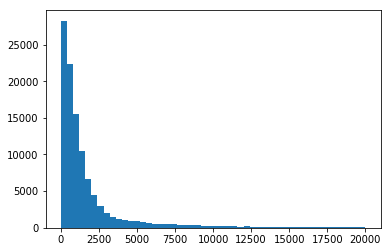

In [213]:
# # np.histogram(merged_csv['8K_Content_cleaned_length'].dropna())
# plt.pyplot.hist(merged_csv['8K_Content_cleaned_length'].dropna(), bins=50, range=[0,20000])

In [214]:
# most records are under 3000 words

# sum(merged_csv['8K_Content_cleaned_length'] < 3000) / len(merged_csv['8K_Content_cleaned_length'])

0.826036482753035

In [231]:
# sum(merged_csv['8K_Content_cleaned_length'] < 1000) / len(merged_csv['8K_Content_cleaned_length'])

0.531438701955526

In [357]:
# TODO: update vocabulary_size with non-arbitary number

# vocabulary_size = 20000
tokenizer = Tokenizer()
tokenizer.fit_on_texts(final_csv['8K_Content_cleaned'])

sequences = tokenizer.texts_to_sequences(final_csv['8K_Content_cleaned'])
data = pad_sequences(sequences, maxlen=300) # takes about 5-10 mins

In [358]:
# vocab size
vocabulary_size = max(tokenizer.word_index.values())

In [360]:
vocabulary_size

926195

In [457]:
# data = pad_sequences(sequences, maxlen=300)

In [458]:
final_csv['8K_Content_sequences'] = data.tolist()

## Convert labels to sparse matrix

In [386]:
# # encode class values as integers
# encoder = LabelEncoder()
# encoder.fit(final_csv['stock_overnight_movement_tag'])
# encoded_labels = encoder.transform(final_csv['stock_overnight_movement_tag'])

# # convert integers to dummy variables (i.e. one hot encoded)
# # dummy_labels = np_utils.to_categorical(encoded_labels)

In [382]:
# encoded_labels

array([1, 1, 0, 1, 1, 1, 2, 1, 1, 0, 1, 2, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1])

In [391]:
# convert integers to dummy variables (i.e. one hot encoded)
encoder = LabelBinarizer()
sparse_labels = encoder.fit_transform(final_csv['stock_overnight_movement_tag'])

In [395]:
encoder.classes_

array(['down', 'stay', 'up'], dtype='<U4')

In [411]:
sparse_labels = pd.DataFrame(data=sparse_labels,columns=['down', 'stay', 'up'])

In [412]:
sparse_labels[:10]

,down,stay,up
0,0,1,0
1,0,1,0
2,1,0,0
3,0,1,0
4,0,1,0
5,0,1,0
6,0,0,1
7,0,1,0
8,0,1,0
9,1,0,0


In [414]:
final_csv['down'] = sparse_labels['down']
final_csv['stay'] = sparse_labels['stay']
final_csv['up'] = sparse_labels['up']

# final_csv[['down', 'stay', 'up']] = sparse_labels


In [415]:
final_csv[:5]

,Unnamed: 0,Unnamed: 0.1,8K_Content,Adj Close_GSPC,Adj Close_stock,Close_GSPC,Close_stock,Date,Day Change_GSPC,Day Change_stock,...,Time,Time_of_day,Volume_GSPC,Volume_stock,Year,stock_overnight_movement_tag,8K_Content_cleaned,down,stay,up
0,0,0,==============================================...,953.99,12.56,953.99,13.04,2002-07-03,5.90,0.71,...,2.002070e+13,out_of_market,1.527800e+09,77171300.0,2002.0,stay,"['securities', 'and', 'exchange', 'commission'...",0,1,0
1,1,2,Table of ContentsDate of report (Date of earli...,937.43,14.18,937.43,14.73,2002-08-20,-13.27,0.06,...,2.002082e+13,out_of_market,1.308500e+09,60171900.0,2002.0,stay,"['table', 'of', 'contentsdate', 'of', 'report'...",0,1,0
2,2,3,Table of Contents Table of ContentsItems 1 th...,843.32,11.56,843.32,12.00,2002-09-19,-26.14,0.04,...,2.002092e+13,out_of_market,1.524000e+09,80020200.0,2002.0,down,"['table', 'of', 'contents', 'table', 'of', 'co...",1,0,0
3,3,4,Table of ContentsDate of report (Date of earli...,882.50,11.31,882.50,11.75,2002-10-24,-13.64,0.27,...,2.002102e+13,out_of_market,1.700570e+09,122749300.0,2002.0,stay,"['table', 'of', 'contentsdate', 'of', 'report'...",0,1,0
4,4,6,Table of ContentsDate of report (Date of earli...,843.59,12.71,843.59,13.20,2003-02-05,-4.61,-0.11,...,2.003020e+13,out_of_market,1.450800e+09,115080200.0,2003.0,stay,"['table', 'of', 'contentsdate', 'of', 'report'...",0,1,0


## Split Dataset Train/Test

In [444]:
# # filter final_csv to only include 'out of market'
# backup_csv = final_csv # backup in case i want to revert back
# final_csv = final_csv[final_csv['Time_of_day'] == 'out_of_market']

In [459]:
# 02-08 train. 09-10 develoment, 11-12 test
# X_train = final_csv['8K_Content_cleaned'][final_csv['Year'] <= 2008]
# X_dev = final_csv['8K_Content_cleaned'][(final_csv['Year'] >= 2009) & 
#                                        (final_csv['Year'] <= 2010)]
# X_test = final_csv['8K_Content_cleaned'][final_csv['Year'] >= 2011]

X_train = final_csv['8K_Content_sequences'][final_csv['Year'] <= 2008]
X_dev = final_csv['8K_Content_sequences'][(final_csv['Year'] >= 2009) & 
                                       (final_csv['Year'] <= 2010)]
X_test = final_csv['8K_Content_sequences'][final_csv['Year'] >= 2011]

y_train = final_csv[['down','up','stay']][final_csv['Year'] <= 2008]
y_dev = final_csv[['down','up','stay']][(final_csv['Year'] >= 2009) & 
                                       (final_csv['Year'] <= 2010)]
y_test = final_csv[['down','up','stay']][final_csv['Year'] >= 2011]

In [460]:
# record count check

# len(X_train) + len(X_dev) + len(X_test)
# len(y_train['down']) + len(y_dev['down']) + len(y_test['down'])
# len(final_csv['8K_Content_cleaned'])


107456

## Build and Train LSTM Model

In [ ]:
# TODO: add Tensorboard

# reload(rnnlm)

# TF_GRAPHDIR = "/tmp/w266_project/finance_text_graph"

# # Clear old log directory.
# shutil.rmtree(TF_GRAPHDIR, ignore_errors=True)

# lm = rnnlm.RNNLM(V=10000, H=200, num_layers=2)
# lm.BuildCoreGraph()
# lm.BuildTrainGraph()
# lm.BuildSamplerGraph()

# summary_writer = tf.summary.FileWriter(TF_GRAPHDIR, lm.graph)


5

In [508]:
# TODO: update arbitary parameters, such as input_length
# build network

model_lstm = Sequential()
model_lstm.add(Embedding(vocabulary_size, 100, input_length=300))
model_lstm.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model_lstm.add(Dense(3, activation='softmax'))
model_lstm.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [493]:
np.array(X_train[:5].values.tolist()).shape

(5, 300)

In [497]:
np.array(y_train[:5].values.tolist()).shape

(5, 3)

In [499]:
y_train[:5].values.shape

(57616, 3)

In [509]:
X_train[:5].values.tolist()

[[221491,
  6296,
  819,
  144,
  6296,
  819,
  144,
  4302,
  9872,
  186487,
  4302,
  7992,
  75133,
  276979,
  6296,
  562,
  221492,
  6296,
  562,
  6296,
  819,
  6998,
  312,
  2,
  89956,
  2805,
  2571,
  5483,
  3750,
  420,
  552,
  610,
  6296,
  819,
  144,
  743,
  641,
  65,
  46,
  907,
  1,
  312,
  2,
  4610,
  412,
  89956,
  2805,
  144,
  2,
  30021,
  3174,
  89956,
  2805,
  4489,
  1124,
  145,
  1164,
  1185,
  18,
  42,
  15243,
  12967,
  784,
  1099,
  2961,
  10944,
  947,
  1901,
  2,
  2210,
  4009,
  4,
  1405,
  564,
  337,
  523,
  6296,
  819,
  6296,
  819,
  144,
  1137,
  41308,
  19,
  1,
  1443,
  2243,
  6,
  5315,
  13,
  1,
  1524,
  1216,
  4,
  79,
  32,
  219,
  26,
  630,
  6296,
  562,
  6296,
  6296,
  819,
  4,
  1,
  6296,
  819,
  3177,
  32,
  548,
  1809,
  2,
  6296,
  819,
  144,
  4,
  5,
  23,
  475,
  6,
  1,
  282,
  142,
  4,
  198,
  21,
  1855,
  29,
  21,
  1809,
  2313,
  6,
  20,
  427,
  32,
  1,
  151,
  2,
  154,
 

In [506]:
np.array(y_train[:5].values).shape

(5, 3)

In [ ]:
# train network

# model_lstm.fit(np.array(X_train[:5].values.tolist()), np.array(y_train[:5].values.tolist()), validation_split=0.4, epochs=5)

model_lstm.fit(np.array(X_train[:5000].values.tolist()), 
               np.array(y_train[:5000].values.tolist()), 
               validation_data=(np.array(X_dev[:5000].values.tolist()), 
                                np.array(y_dev[:5000].values.tolist())), 
               epochs=5)

#TODO: change validation split to validation_data

# takes about 3 mins per epoch using 2/3 of full dataset
# takes about 3 hours per epoch using full dataset (less testing set) 


Train on 5000 samples, validate on 5000 samples
Epoch 1/5
5000/5000 [==============================] - 203s 41ms/step - loss: 0.6128 - acc: 0.8014 - val_loss: 0.6554 - val_acc: 0.7650
Epoch 2/5
5000/5000 [==============================] - 207s 41ms/step - loss: 0.5251 - acc: 0.8060 - val_loss: 0.6870 - val_acc: 0.7630
Epoch 3/5
4192/5000 [========================>.....] - ETA: 30s - loss: 0.4727 - acc: 0.8194

In [ ]:
# test network

model_lstm.evaluate(np.array(X_test[:5000].values.tolist()), 
                    np.array(y_test[:5000].values.tolist()))
                    

In [ ]:
# predict

model_lstm_prds = model_lstm.predict(np.array(X_test[:5000].values.tolist()))

In [ ]:
model_lstm.predict(X_test)

In [ ]:
# save model

# serialize model to JSON
model_lstm_json = model_lstm.to_json()
with open("model_lstm.json", "w") as json_file:
    json_file.write(model_lstm_json)
# serialize weights to HDF5
model_lstm.save_weights("model_lstm.h5")
print("Saved model to disk")

In [257]:
# load model
# note: latest file updated 11/30. 3,000 word sequence.

# load json and create model
json_file = open('model_lstm.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights("model_lstm.h5")
print("Loaded model from disk")

Loaded model from disk


In [266]:
# evaluate loaded model on test data
loaded_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# loaded_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
score = loaded_model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

acc: 53.18%


In [267]:
loaded_model.predict(X_test)

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

## LSTM with 1D Convolutional Layer

In [117]:
def create_conv_model():
    model_conv = Sequential()
    model_conv.add(Embedding(vocabulary_size, 100, input_length=300))
    model_conv.add(Dropout(0.2))
    model_conv.add(Conv1D(64, 5, activation='relu'))
    model_conv.add(MaxPooling1D(pool_size=4))
    model_conv.add(LSTM(100))
    model_conv.add(Dense(1, activation='softmax'))
    model_conv.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model_conv

In [118]:
model_conv = create_conv_model()
model_conv.fit(X_train, y_train, validation_split=0.4, epochs = 10)

Train on 66848 samples, validate on 44566 samples
Epoch 1/10
66848/66848 [==============================] - 127s 2ms/step - loss: 7.3688 - acc: 0.5378 - val_loss: 7.3970 - val_acc: 0.5360
Epoch 2/10
66848/66848 [==============================] - 120s 2ms/step - loss: 7.3688 - acc: 0.5378 - val_loss: 7.3970 - val_acc: 0.5360
Epoch 3/10
66848/66848 [==============================] - 121s 2ms/step - loss: 7.3688 - acc: 0.5378 - val_loss: 7.3970 - val_acc: 0.5360
Epoch 4/10
66848/66848 [==============================] - 118s 2ms/step - loss: 7.3688 - acc: 0.5378 - val_loss: 7.3970 - val_acc: 0.5360
Epoch 5/10
66848/66848 [==============================] - 123s 2ms/step - loss: 7.3688 - acc: 0.5378 - val_loss: 7.3970 - val_acc: 0.5360
Epoch 6/10
66848/66848 [==============================] - 118s 2ms/step - loss: 7.3688 - acc: 0.5378 - val_loss: 7.3970 - val_acc: 0.5360
Epoch 7/10
66848/66848 [==============================] - 118s 2ms/step - loss: 7.3688 - acc: 0.5378 - val_loss: 7.3970 - 

In [119]:
model_conv.evaluate(X_test, y_test)

111414/111414 [==============================] - 27s 239us/step


[7.380082198507702, 0.537077925569533]

In [120]:
min(model_conv.predict(X_test))

array([1.], dtype=float32)

In [121]:
model_conv.predict(X_test)

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

In [122]:
# # save model

model_conv_json = model_conv.to_json()
with open("model_conv.json", "w") as json_file:
    json_file.write(model_conv_json)
# serialize weights to HDF5
model_conv.save_weights("model_conv.h5")
print("Saved model to disk")

Saved model to disk


In [268]:
# load model

# load json and create model
json_file = open('model_conv.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights("model_conv.h5")
print("Loaded model from disk")

Loaded model from disk


In [269]:
# evaluate loaded model on test data
loaded_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#loaded_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
score = loaded_model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

acc: 53.18%


In [270]:
loaded_model.predict(X_test)

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

## Use pre-trained Glove word embeddings

In [29]:
# # load GLOVE embeddings
# embeddings_index = dict()
# f = open('~/glove.6B/glove.6B.100d.txt')
# for line in f:
#     values = line.split()
#     word = values[0]
#     coefs = np.asarray(values[1:], dtype='float32')
#     embeddings_index[word] = coefs
# f.close()
# print('Loaded %s word vectors.' % len(embeddings_index))

FileNotFoundError: [Errno 2] No such file or directory: '~/glove.6B/glove.6B.100d.txt'

In [114]:
# !cd ~/glove.6B

In [ ]:
# embeddings_index

In [ ]:
# # create a weight matrix for words in training docs
# embedding_matrix = np.zeros((vocabulary_size, 100))
# for word, index in tokenizer.word_index.items():
#     if index > vocabulary_size - 1:
#         break
#     else:
#         embedding_vector = embeddings_index.get(word)
#         if embedding_vector is not None:
#             embedding_matrix[index] = embedding_vector

In [ ]:
# # LSTM and CNN model
# model_glove = Sequential()
# model_glove.add(Embedding(vocabulary_size, 100, input_length=50, weights=[embedding_matrix], trainable=False))
# model_glove.add(Dropout(0.2))
# model_glove.add(Conv1D(64, 5, activation='relu'))
# model_glove.add(MaxPooling1D(pool_size=4))
# model_glove.add(LSTM(100))
# model_glove.add(Dense(1, activation='softmax'))
# model_glove.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# # train model
# model_glove.fit(data, merged_csv['movement'], validation_split=0.4, epochs=3)

In [ ]:
# # evaluate model
# model_glove.evaluate(data, merged_csv['movement'])

## Use Word2Vec to train word embeddings on corpus

In [ ]:
# from gensim.models import Word2Vec
# import nltk
# # nltk.download('punkt')

In [ ]:
# # tokenize financial data
# merged_csv['tokenized'] = merged_csv.apply(lambda row : nltk.word_tokenize(row['8K_Content_cleaned']), axis=1)


In [ ]:
# merged_csv.head()


In [ ]:
# #train
# model_w2v = Word2Vec(merged_csv['tokenized'], size=100)

In [ ]:
# X = model_w2v[model_w2v.wv.vocab]

In [ ]:
# X.shape

In [ ]:
# # Create LSTM and CNN model

# model_w2v = Sequential()
# model_w2v.add(Embedding(1925, 100, input_length=50, weights=[X], trainable=False))
# model_w2v.add(Dropout(0.2))
# model_w2v.add(Conv1D(64, 5, activation='relu'))
# model_w2v.add(MaxPooling1D(pool_size=4))
# model_w2v.add(LSTM(100))
# model_w2v.add(Dense(1, activation='softmax'))
# model_w2v.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# # train model
# model_w2v.fit(data, merged_csv['movement'], validation_split=0.4, epochs=3)


## Plot Word Vectors Using PCA

In [300]:
# from sklearn.decomposition import TruncatedSVD


In [301]:
# tsvd = TruncatedSVD(n_components=5, n_iter=10)
# result = tsvd.fit_transform(X)

In [302]:
# result.shape

(1925, 5)

In [304]:
# tsvd_word_list = []
# words = list(model_w2v.wv.vocab)
# for i, word in enumerate(words):
#     tsvd_word_list.append(word)

In [309]:
# len(words)

1925

In [311]:
# tsvd_word_list = []
# words = list(model_w2v.wv.vocab)
# for i, word in enumerate(words):
#     tsvd_word_list.append(word)

# trace = go.Scatter(
#     x = result[0:len(words), 0], 
#     y = result[0:len(words), 1],
#     mode = 'markers',
#     text= tsvd_word_list[0:len(words)]
# )

# layout = dict(title= 'SVD 1 vs SVD 2',
#               yaxis = dict(title='SVD 2'),
#               xaxis = dict(title='SVD 1'),
#               hovermode= 'closest')

# fig = dict(data = [trace], layout= layout)
# py.iplot(fig)

## Visualize word embeddings

In [247]:
# lstm_embds = model_lstm.layers[0].get_weights()[0]

In [248]:
# conv_embds = model_conv.layers[0].get_weights()[0]

In [249]:
# glove_emds = model_lstm.layers[0].get_weights()[0]

In [250]:
# word_list = []
# for word, i in tokenizer.word_index.items():
#     word_list.append(word)

In [251]:
# def plot_words(data, start, stop, step):
#     trace = go.Scatter(
#         x = data[start:stop:step,0], 
#         y = data[start:stop:step, 1],
#         mode = 'markers',
#         text= word_list[start:stop:step]
#     )
#     layout = dict(title= 't-SNE 1 vs t-SNE 2',
#                   yaxis = dict(title='t-SNE 2'),
#                   xaxis = dict(title='t-SNE 1'),
#                   hovermode= 'closest')
#     fig = dict(data = [trace], layout= layout)
#     py.iplot(fig)

In [252]:
# # LSTM embeddings 

# lstm_tsne_embds = TSNE(n_components=2).fit_transform(lstm_embds)

In [254]:
# plot_words(lstm_tsne_embds, 0, 2000, 1)


In [253]:
# # CNN + LSTM
# conv_tsne_embds = TSNE(n_components=2).fit_transform(conv_embds)


KeyboardInterrupt: 

In [ ]:
# plot_words(conv_tsne_embds, 0, 2000, 1)


In [255]:
# # Glove

# glove_tsne_embds = TSNE(n_components=2).fit_transform(glove_emds)


In [256]:
# plot_words(glove_tsne_embds, 0, 2000, 1)
